In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


## Adding some noise

In [11]:
x_train_noisy = x_train + np.random.normal(loc = 0.0, scale = 0.5, size = x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.normal(loc = 0.0, scale = 0.5, size = x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

(50000, 3072)
(10000, 3072)


In [12]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'tanh')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [16]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train_noisy, x_train_noisy, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test_noisy, x_test_noisy])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 232us/step - loss: 2.5865 - accuracy: 0.1965 - val_loss: 2.3096 - val_accuracy: 0.1946
Epoch 2/50
50000/50000 [==============================] - 13s 255us/step - loss: 2.2992 - accuracy: 0.1902 - val_loss: 2.3055 - val_accuracy: 0.1996
Epoch 3/50
50000/50000 [==============================] - 12s 231us/step - loss: 2.2454 - accuracy: 0.1978 - val_loss: 1.9986 - val_accuracy: 0.2166
Epoch 4/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.9939 - accuracy: 0.2046 - val_loss: 2.0045 - val_accuracy: 0.2038
Epoch 5/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.9960 - accuracy: 0.2017 - val_loss: 2.0032 - val_accuracy: 0.2060
Epoch 6/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.9940 - accuracy: 0.2059 - val_loss: 2.0005 - val_accuracy: 0.2102
Epoch 7/50
50000/50000 [==============================] 

In [17]:
encoded_test_data = encoder.predict(x_test_noisy)
predicted_test_data = autoencoder.predict(x_test_noisy)

In [18]:
encoded_test_data.shape

(10000, 32)

In [19]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [20]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [21]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Denoised_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Denoising_Encoders_Test_RTADB.csv', index = False)

In [22]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : airplane


In [23]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 1


In [24]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test_noisy)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [25]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [26]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
10,0,airplane,0.0,0.0,0.0,0.0,0.0,0.0,1.578148,0.000000,...,0.768088,0.0,5.962734,0.012670,0.0,0.0,0.0,0.000000,1.000000,0.000000
3164,0,airplane,0.0,0.0,0.0,0.0,0.0,0.0,1.417072,0.000000,...,0.684689,0.0,5.306494,0.001310,0.0,0.0,0.0,0.000000,0.999993,0.000007
2913,0,airplane,0.0,0.0,0.0,0.0,0.0,0.0,1.551975,0.000000,...,0.739408,0.0,5.796243,0.023763,0.0,0.0,0.0,0.000000,0.999993,0.000007
3319,2,bird,0.0,0.0,0.0,0.0,0.0,0.0,1.461591,0.000000,...,0.710370,0.0,5.538655,0.005754,0.0,0.0,0.0,0.000000,0.999991,0.000009
6573,7,horse,0.0,0.0,0.0,0.0,0.0,0.0,1.767049,0.000000,...,0.876306,0.0,6.751917,0.000000,0.0,0.0,0.0,0.000000,0.999989,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,3,cat,0.0,0.0,0.0,0.0,0.0,0.0,1.505497,0.000000,...,0.000000,0.0,4.117096,2.766248,0.0,0.0,0.0,0.010076,0.760875,0.239125
906,1,automobile,0.0,0.0,0.0,0.0,0.0,0.0,1.562185,0.000000,...,0.000000,0.0,4.039298,2.763552,0.0,0.0,0.0,0.013871,0.760228,0.239772
6574,0,airplane,0.0,0.0,0.0,0.0,0.0,0.0,0.804239,0.001503,...,0.000000,0.0,2.160752,1.497167,0.0,0.0,0.0,0.000000,0.758080,0.241920
5361,3,cat,0.0,0.0,0.0,0.0,0.0,0.0,1.491668,0.000000,...,0.000000,0.0,3.905192,2.713232,0.0,0.0,0.0,0.015221,0.753636,0.246364


In [27]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

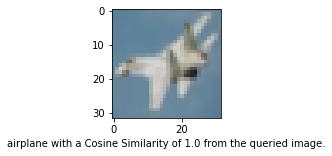

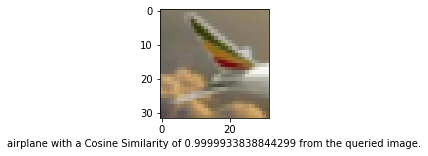

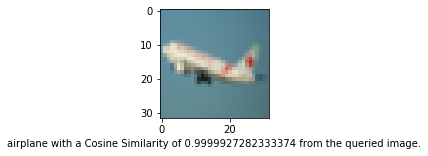

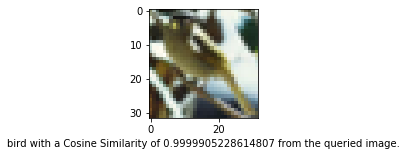

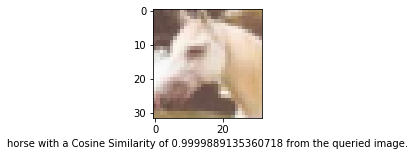

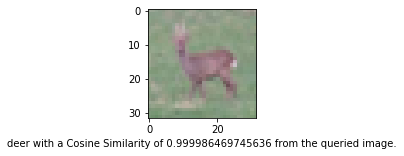

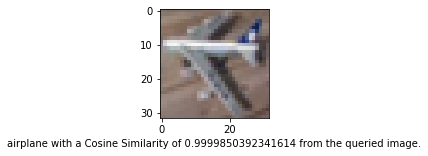

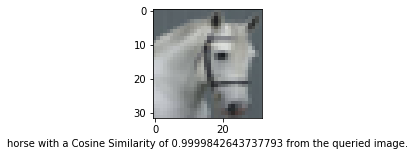

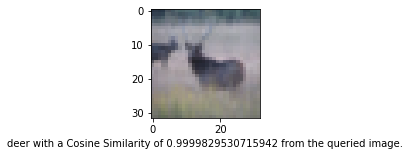

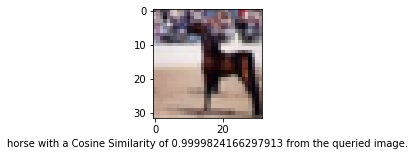

In [28]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [29]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [30]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
10,0,airplane,0.0,0.000000,0.0,0.0,0.0,0.0,1.578148,0.0,...,0.0,5.962734,0.012670,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
1233,4,deer,0.0,0.000000,0.0,0.0,0.0,0.0,1.549244,0.0,...,0.0,5.903481,0.000000,0.0,0.0,0.0,0.0,0.999983,0.000017,0.079624
3588,6,frog,0.0,0.000000,0.0,0.0,0.0,0.0,1.581976,0.0,...,0.0,5.894299,0.000000,0.0,0.0,0.0,0.0,0.999964,0.000036,0.082171
8038,6,frog,0.0,0.000000,0.0,0.0,0.0,0.0,1.542092,0.0,...,0.0,5.946043,0.000000,0.0,0.0,0.0,0.0,0.999928,0.000072,0.089348
6330,6,frog,0.0,0.000000,0.0,0.0,0.0,0.0,1.584682,0.0,...,0.0,5.968143,0.066620,0.0,0.0,0.0,0.0,0.999929,0.000071,0.090155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,9,truck,0.0,0.030524,0.0,0.0,0.0,0.0,0.069400,0.0,...,0.0,0.982182,0.000000,0.0,0.0,0.0,0.0,0.911532,0.088468,6.142762
6234,7,horse,0.0,0.028501,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,1.010905,0.000000,0.0,0.0,0.0,0.0,0.888565,0.111435,6.147613
1078,0,airplane,0.0,0.000000,0.0,0.0,0.0,0.0,3.065618,0.0,...,0.0,11.144792,0.886268,0.0,0.0,0.0,0.0,0.995899,0.004101,6.217515
8448,4,deer,0.0,0.007859,0.0,0.0,0.0,0.0,0.028283,0.0,...,0.0,0.866245,0.000000,0.0,0.0,0.0,0.0,0.882968,0.117032,6.260284


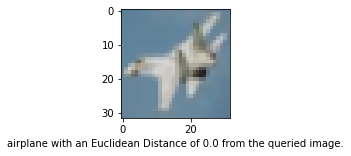

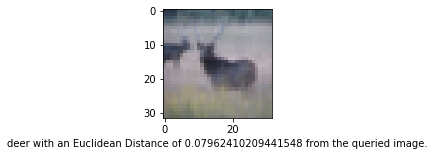

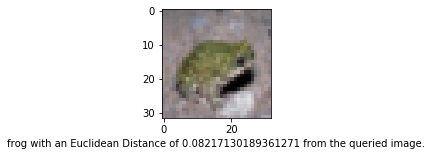

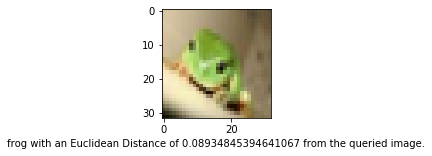

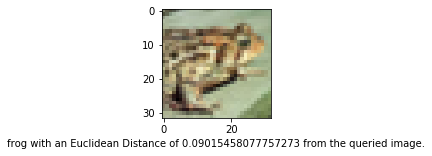

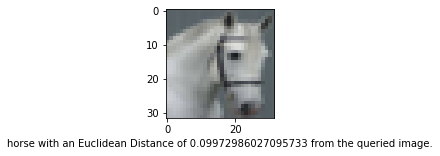

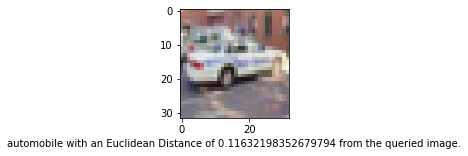

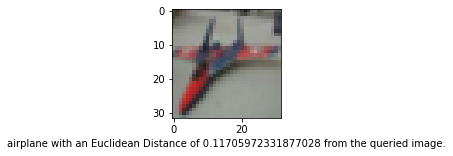

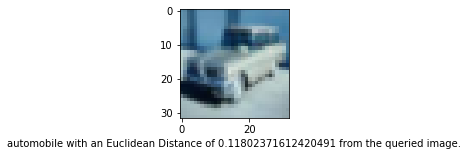

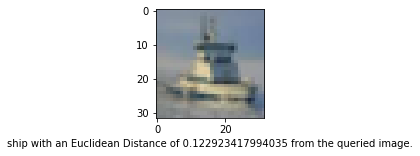

In [31]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()